In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer
import mglearn
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:

iris = load_iris()
X, y = iris["data"], iris["target"]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42)
print(X_train,X_test,y_train,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))
print(np.mean(y_pred == y_test))

In [ ]:


cancer = load_breast_cancer()
X, y = cancer['data'], cancer["target"]
print(X.shape, y.shape)
#베이스라인으로 그냥 돌려보고 생각을 해보자
#뭘 없앨지 -> 수치를 높이기 위해

#애매한 이유
#궁금한 것


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
%pip install mglearn

In [ ]:
#algorithm 
    #kd_tree
    #ball_tree
    #bruite 희소 행렬
#metric
#   minkowski
#n_jobs : int, default=None
    # -1 cpu 최대로


#회귀

In [ ]:


housing = fetch_california_housing()
X, y = housing["data"], housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsRegressor()  # KNN 회귀 모델 생성
knn.fit(X_train, y_train)    # 학습

y_pred = knn.predict(X_test) # 예측
print(mean_squared_error(y_test, y_pred))  # MSE 출력


In [ ]:
# 데이터 불러오기
housing = fetch_california_housing()
X, y = housing["data"], housing["target"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# KNN 회귀 모델 학습
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)



In [ ]:
# 산점도 그리기
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='cyan')
plt.plot([0, 5], [0, 5], color='red')  # y=x 선
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [ ]:
#L1 l2규제

In [ ]:
models = {
    "OLS":LogisticRegression(penalty=None, max_iter=10000),
    "Ridge(L2)": LogisticRegression(penalty='l2',solver="lbfgs",max_iter=10000),
    "Lasso(L1)": LogisticRegression(penalty='l1',solver="liblinear",max_iter=10000),
} 

l2 y = aw + b 에서 w를 최대한 작게 만들고 양을 많이해서 찾고자 하는 기울기로 간다
lbfgs는 학습 효율을 보조하기 위해서

* l2는 일반화 성능에 관심이 있으면 L2를 선택하는 경향이 있음

l1 은 주요한 특성을 스스로 고려하는 모델의 경우 선택하는 경향 => 모델 해석하는데 용이함


In [ ]:
result = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test,y_pred_prob)
    result[name] = auc

    

In [ ]:
#LogisticRegression C를 이용해서 규제 강도를 결정
#C를 크게하면 없는 특성도 발연
    #데이터가 많이 없을 때
#작은 < 1.0 < 큰거
# 강한 규제 < 일반 규제 < 규제를 해제
lr =LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)

#훈련 및 예측이 굉장히 빠름(학습이 빠른건 아님)
#파라미터에 비교적 둔감
#고차원 희소 데이터에 잘 작동
#단점 선형 모델보다 항상 낮은 성능

#팔머 팽귄 문제
- 1 : 데이터 불러오기
- 2 : 데이터 분리
- 3 : 모델 학스
- 4 : 예측
- 5 : 결과

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('penguins.csv')

In [ ]:
df.head()

In [ ]:
df = df.fillna(0)
df.info()

In [ ]:
X = df.drop(["species","sex","island"],axis=1)
y = df["species"]
print(X.shape,y.shape)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)
loc_y_pred = lr.predict(X_test)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_y_pred = gnb.predict(X_test)

In [ ]:

print(accuracy_score(y_test,knn_y_pred))
print(accuracy_score(y_test,loc_y_pred))
print(accuracy_score(y_test,gnb_y_pred))

In [ ]:
import mglearn
import matplotlib.pyplot as plt

In [ ]:

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print(f"X.shape : {X.shape}" )

In [ ]:
X

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:

cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())
X_train, X_test, y_train,y_test = train_test_split(cancer['data'],cancer['target'],random_state=42)
X_train.shape, y_train.shape

In [ ]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2,:2]])
target = raw_df.values[1::2,2]



In [ ]:
print("데이터의 형태:",data.shape)
print("데이터의 형태:",target.shape)

In [ ]:
raw_df.info()
raw_df.head()


In [ ]:
raw_df.fillna(raw_df.median(axis=0))

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [20]:
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
ridge = Ridge(alpha=0.01).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.78
훈련 세트 점수: 0.94
테스트 세트 점수: 0.81


훈련 세트 점수: 0.77
테스트 세트 점수: 0.73


array([-8.74524970e-01,  3.74153966e-01, -5.37191658e-01,  4.53586968e-01,
       -8.15963925e-01,  4.80636190e+00, -2.88506643e-01, -2.38249397e+00,
        9.93098394e-01, -9.07184758e-01, -1.99590641e+00,  1.23744798e+00,
       -4.24598011e+00, -7.73437857e-01,  3.42301983e-03, -5.66607754e-01,
        2.50207988e-01, -6.47237726e-01, -7.68604076e-01, -7.85761746e-01,
       -7.62482023e-02, -8.97956236e-01, -8.15721900e-01, -7.27219784e-01,
       -7.23636498e-01, -5.05561216e-01,  6.41377060e-01, -2.03532600e-01,
        7.22065507e-01,  2.91451872e-01,  1.51896935e+00, -8.91051400e-02,
       -2.34537621e-01, -5.53427855e-02, -1.98367137e-01, -3.48947550e-02,
        4.03606579e-01, -5.53847205e-01,  7.58993451e-01,  3.93520570e-01,
       -7.78852421e-01, -4.83501941e-01,  1.80828848e-01, -1.04042906e+00,
        3.41226328e-01,  5.57759083e-01, -4.85625572e-01,  3.00283500e-01,
       -1.44355231e+00,  4.53586968e-01, -1.13170406e+00,  7.10542026e-01,
        3.68804814e-01, -

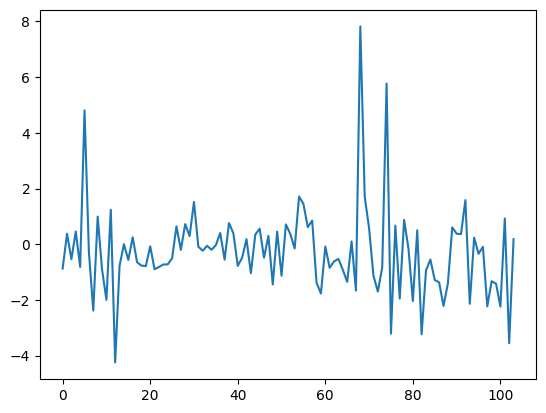

In [27]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)))


plt.plot(ridge10.coef_)
ridge10.coef_

훈련 세트 점수: 0.92
테스트 세트 점수: 0.82


array([-3.36994290e+00, -4.55190759e+00, -4.74074443e+00,  6.15408550e+00,
        7.81347201e+00,  2.21689199e+01,  3.81452328e+00, -1.01476683e+01,
        1.33231358e+01,  1.02318222e+00, -8.94490702e-01,  1.07107600e+01,
       -3.92650132e+00,  5.16327176e+00,  1.13872172e-02, -1.66222209e+00,
        1.00409642e+01, -1.65391325e+00,  3.93109854e+00, -4.56395574e+00,
       -2.20183915e-01, -4.30371408e+00, -3.35451499e+00, -3.28745746e+00,
        1.65616423e+00, -1.11100717e-03,  2.86959722e+00, -1.66212151e+00,
        7.00989388e+00,  1.79165465e+00,  5.61350816e+00, -2.47866008e+00,
       -1.22529694e+00, -2.15501876e+00,  8.45630083e+00,  5.28803385e+00,
       -3.07510884e+00, -6.26997306e+00,  6.01995793e+00,  3.80477125e+00,
        7.28701883e+00,  2.94301008e+00,  4.47299605e+00, -4.34734959e+00,
        3.22661120e+00,  6.60392499e+00, -8.01387571e+00,  1.55194737e+00,
       -1.33452450e+01,  6.15408550e+00, -1.47259032e+01, -1.83724438e+01,
        3.61720666e+00, -

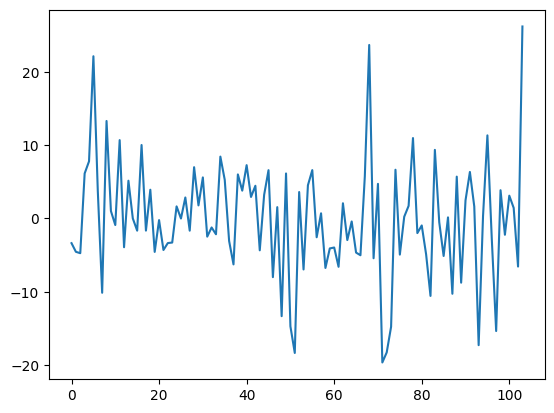

In [29]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)))

plt.plot(ridge01.coef_)
ridge01.coef_

훈련 세트 점수: 0.56
테스트 세트 점수: 0.55


array([-2.72887569e-01,  4.08900513e-01, -5.97713878e-01,  6.29081693e-01,
       -4.63913574e-01,  1.73793977e+00, -2.77523689e-01, -3.97586257e-01,
       -3.95031009e-02, -4.95196399e-01, -1.23380559e+00,  6.88052428e-01,
       -1.94182924e+00, -1.60708323e-01,  1.21513641e-03, -1.77796257e-01,
        4.68458165e-02, -1.87986973e-01, -1.33082706e-01, -2.52522503e-01,
       -1.44022227e-02, -2.68845155e-01, -2.48006117e-01, -2.25028956e-01,
       -1.83298699e-01, -2.00352418e-01,  2.89002391e-01,  1.12522383e-02,
        1.71790433e-01,  1.08684195e-01,  5.02444604e-01,  1.39883541e-01,
        2.97959904e-02,  3.42831346e-02,  2.38463538e-02, -2.43737913e-02,
        4.09325442e-01, -7.04613338e-02, -3.17407675e-01,  3.22345091e-01,
       -5.18569462e-01,  1.04209098e-01, -4.82379168e-01, -1.82519737e-01,
       -1.53087150e-01, -2.65071687e-01, -6.25184481e-01, -1.56240037e-01,
       -1.00069404e+00,  6.29081693e-01,  6.92581575e-02,  5.93725156e-01,
        4.76520463e-01,  

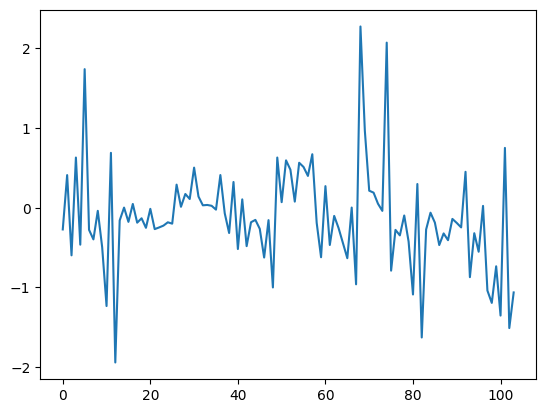

In [30]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge100.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge100.score(X_test,y_test)))

plt.plot(ridge100.coef_)
ridge100.coef_

c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


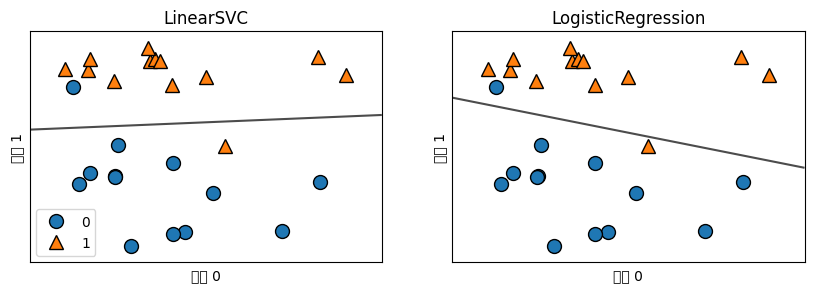

In [33]:
import mglearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:, 1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [35]:
X, y

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,random_state=42)

In [33]:
logreg = LogisticRegression(C=100,max_iter=5000).fit(X_train,y_train)

In [34]:
print(f"훈련 세트 점수 :{logreg.score(X_train,y_train)}")
print(f"테스트 세트 점수 :{logreg.score(X_test,y_test)}")

훈련 세트 점수 :0.9788732394366197
테스트 세트 점수 :0.965034965034965
